<a href="https://colab.research.google.com/github/JeDevCodes/Encryptix/blob/main/pet_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os

import numpy as np
import pandas

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Flatten, Rescaling, BatchNormalization, GlobalAveragePooling2D, RandomFlip, RandomRotation, RandomZoom, RandomCrop, RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as mpimg
import random

In [4]:
TRAIN_PATH = Path("./dogscats/train/")
VAL_PATH = Path("./dogscats/valid/")

SIZE = 150
CLASSES = "cats", "dogs"

In [8]:
from tensorflow.keras.applications.vgg16 import preprocess_input

#datagen
train_datagenerator=ImageDataGenerator(preprocessing_function=preprocess_input,
                                      rotation_range=20,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True )


train=train_datagenerator.flow_from_directory(
    TRAIN_PATH,
    target_size=(SIZE, SIZE),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb'

)


Found 23000 images belonging to 2 classes.


In [9]:
test_datagenerator = ImageDataGenerator(preprocessing_function=preprocess_input)
validation = test_datagenerator.flow_from_directory(VAL_PATH,
                                                target_size=(SIZE, SIZE),
                                                batch_size=64,
                                                class_mode='categorical',
                                                color_mode='rgb')

Found 2000 images belonging to 2 classes.


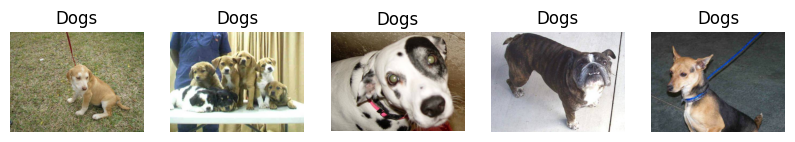

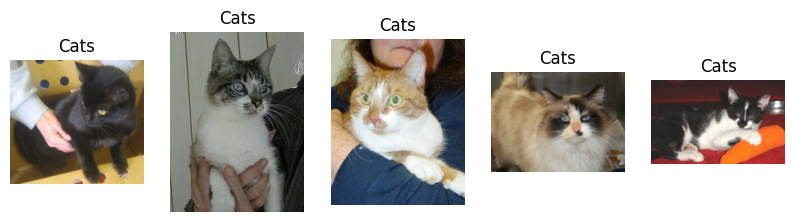

In [10]:
def visualize_random_photos(base_dir, num_images=5):
    base = os.path.join(base_dir)
    categories = os.listdir(base)

    for category in categories:
        image_files = random.sample(os.listdir(base+"/"+category), 5)

        plt.figure(figsize=(10, 10))
        for i, img_file in enumerate(image_files, 1):
            img_path = os.path.join(base, category, img_file)
            plt.subplot(1, num_images, i)
            plt.imshow(mpimg.imread(img_path))
            plt.axis("off")
            plt.title(f"{category.capitalize()}")

    plt.show()

visualize_random_photos(TRAIN_PATH, 5)

In [11]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications import VGG16

model=VGG16(include_top=False,input_shape=(SIZE, SIZE, 3))

#not update weigths at training
for layers in model.layers:
    layers.trainable=False

custom_model=Sequential([
    Flatten(),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(len(CLASSES), activation='softmax')
])

VGG16_model = Model(inputs=model.input, outputs=custom_model(model.output))

VGG16_model.compile(optimizer='adam',
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [12]:
model_weights_at_epochs = {}

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        model_weights_at_epochs[epoch] = self.model.get_weights()

In [13]:
history = VGG16_model.fit(
        train,
        epochs=8,
        batch_size=32,
        validation_data=validation,
        callbacks=[CustomCallback()]
    )

Epoch 1/8


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


360/360 ━━━━━━━━━━━━━━━━━━━━ 241s 614ms/step - accuracy: 0.8768 - loss: 4.5553 - val_accuracy: 0.9640 - val_loss: 0.1016
Epoch 2/8
360/360 ━━━━━━━━━━━━━━━━━━━━ 180s 491ms/step - accuracy: 0.9456 - loss: 0.1509 - val_accuracy: 0.9680 - val_loss: 0.0842
Epoch 3/8
360/360 ━━━━━━━━━━━━━━━━━━━━ 199s 484ms/step - accuracy: 0.9472 - loss: 0.1369 - val_accuracy: 0.9665 - val_loss: 0.0903
Epoch 4/8
360/360 ━━━━━━━━━━━━━━━━━━━━ 202s 485ms/step - accuracy: 0.9487 - loss: 0.1347 - val_accuracy: 0.9730 - val_loss: 0.0789
Epoch 5/8
360/360 ━━━━━━━━━━━━━━━━━━━━ 201s 478ms/step - accuracy: 0.9545 - loss: 0.1188 - val_accuracy: 0.9635 - val_loss: 0.1027
Epoch 6/8
360/360 ━━━━━━━━━━━━━━━━━━━━ 201s 479ms/step - accuracy: 0.9540 - loss: 0.1222 - val_accuracy: 0.9680 - val_loss: 0.0824
Epoch 7/8
360/360 ━━━━━━━━━━━━━━━━━━━━ 205s 484ms/step - accuracy: 0.9574 - loss: 0.1067 - val_accuracy: 0.9670 - val_loss: 0.0903
Epoch 8/8
360/360 ━━━━━━━━━━━━━━━━━━━━ 200s 482ms/step - accuracy: 0.9576 - loss: 0.1099 - va

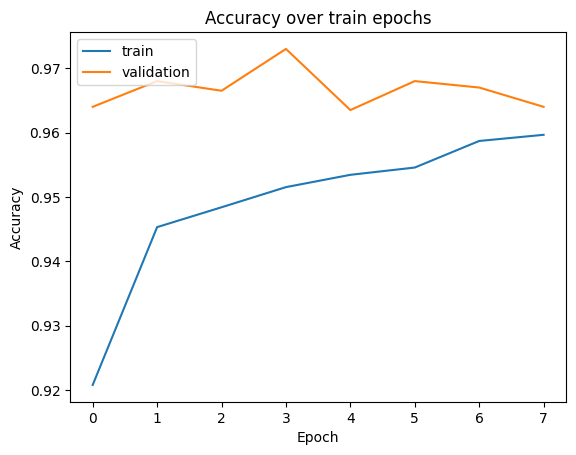

In [14]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [16]:
import pickle

with open('model_pet', 'wb') as f:
    pickle.dump(VGG16_model, f)

In [19]:
from google.colab import files

# Download the file
files.download('/content/model_pet')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>